In [24]:
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.signal import butter, lfilter
from utils import highpass_filter, bandpass_filter, normalize_audio, convert_wav_ndarray_to_bytearray, reduce_noise_with_deepfilternet
import noisereduce as nr
import numpy as np

In [25]:
input_path = "../wav/noise_reduce_input.wav"
output_path = "../wav/noise_reduce_out.wav"

input_path = "../wav/maurodone.wav"

In [ ]:
Audio(input_path)

In [27]:
def reduce_noise(audio, sampling_rate, use_deep=False, use_highpass=False, use_bandpass=False, use_normalize=False, use_nr=False):
    if audio.ndim > 1 and audio.shape[1] > 1:
        audio = np.mean(audio, axis=1)  # Average left and right channels
    print("Audio shape:", audio.shape)
    # save wav file for debugging as input.wav to /wav
    #sf.write('./wav/noise_reduce_input.wav', data=audio, samplerate=sampling_rate)
    # apply highpass_filter, remove low frequencies (humming etc.)
    if use_highpass:
        audio = highpass_filter(audio=audio, sr=sampling_rate)
    # optionally apply bandpass_filter
    if use_bandpass:
        audio = bandpass_filter(audio, sr=sampling_rate)
    # normalize audio, emphasisze voices
    if use_normalize:
        audio = normalize_audio(audio)
    if use_nr:
        audio = nr.reduce_noise(y=audio, sr=sampling_rate, n_fft=512, prop_decrease=0.9)
    if use_deep:
        audio = reduce_noise_with_deepfilternet(audio=audio, sr=sampling_rate)
    # save wav file for debugging as output.wav to /wav
    sf.write('../wav/noise_reduce_out.wav', audio, samplerate= sampling_rate)
    # back to bytes
    return convert_wav_ndarray_to_bytearray(audio, sr = sampling_rate), audio

In [ ]:
params={
    "use_deep": True,
    "use_highpass:":True
    }
input_audio, sampling_rate = sf.read(file=input_path)
reduce_noise(input_audio, sampling_rate, use_deep=True, use_highpass=True)
output_audio, _ = sf.read(file=output_path)

In [ ]:
Audio(data=output_path)

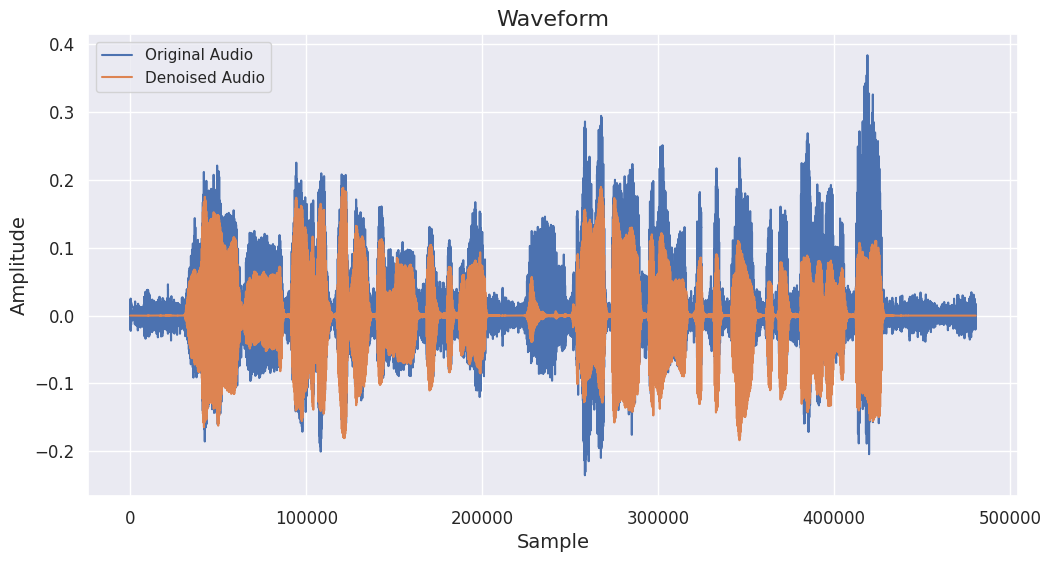

In [60]:
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
from scipy.signal import butter, lfilter

# Set the seaborn style and color palette
sns.set_theme(style="darkgrid")
sns.set_palette("deep")

# Increase the default figure size
plt.rcParams['figure.figsize'] = (12, 6)

# Increase font sizes
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Waveform")
sns.lineplot(input_audio, label="Original Audio")
sns.lineplot(output_audio_smoothed, label="Denoised Audio")
plt.legend()


In [ ]:
# import itertools
# param_combinations = [
#     dict(zip(['use_deep', 'use_highpass', 'use_bandpass', 'use_normalize', 'use_nr'], combo))
#     for combo in itertools.product([False, True], repeat=5)
# ]
# for combo in param_combinations:
#     reduce_noise(input_audio, sampling_rate, **combo)
#     output_audio, sampling_rate = sf.read(output_path)
#     # visualize 
#     plt.figure(figsize=(10,5))
#     plt.plot(input_audio)
#     plt.plot(output_audio, alpha=0.5)
#     plt.title(combo)
#     plt.show()